## Ensemble Methods

Problem Statement: Build a model that predicts the loan status of the applicant considering different factors like Age, Income, Credit history etc

## Step1: Data Gathering

In [1]:
import pandas as pd 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/train_loan.csv'
df = pd.read_csv(path)
df.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

### Step2: Perform basic data quality checks

In [3]:
df.shape

(58645, 13)

In [4]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
## check missing values
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
## Check the duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop_duplicates()

## Step3: Separate X and Y features
    Y => loan_status
    X => Remaining all others columns

In [10]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [11]:
X = df.drop(columns=['id','loan_status'])
Y = df[['loan_status']]

In [12]:
X.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          37          35000                  RENT                0.0   
1          22          56000                   OWN                6.0   
2          29          28800                   OWN                8.0   
3          30          70000                  RENT               14.0   
4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         N                          14  
1                         N                           2  
2                         N                          10  
3                         N                           5  
4                         N                           3

In [13]:
Y.head()

loan_status
0            0
1            0
2            0
3            0
4            0

## Step4: Data Preprocessing and Data Cleaning 

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [15]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [16]:
print(cat)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [17]:
print(con)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [20]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [21]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [22]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')

In [24]:
X_pre = pre.fit_transform(X)
X_pre.head()

cat__person_home_ownership_MORTGAGE  cat__person_home_ownership_OTHER  \
0                                  0.0                               0.0   
1                                  0.0                               0.0   
2                                  0.0                               0.0   
3                                  0.0                               0.0   
4                                  0.0                               0.0   

   cat__person_home_ownership_OWN  cat__person_home_ownership_RENT  \
0                             0.0                              1.0   
1                             1.0                              0.0   
2                             1.0                              0.0   
3                             0.0                              1.0   
4                             0.0                              1.0   

   cat__loan_intent_DEBTCONSOLIDATION  cat__loan_intent_EDUCATION  \
0                                 0.0                         1.0   
1                                 0.0                         0.0   
2                                 0.0                         0.0   
3                                 0.0                         0.0   
4                                 0.0                         0.0   

   cat__loan_intent_HOMEIMPROVEMENT  cat__loan_intent_MEDICAL  \
0                               0.0                       0.0   
1                               0.0                       1.0   
2                               0.0                       0.0   
3                               0.0                       0.0   
4                               0.0                       1.0   

   cat__loan_intent_PERSONAL  cat__loan_intent_VENTURE  ...  \
0                        0.0                       0.0  ...   
1                        0.0                       0.0  ...   
2                        1.0                       0.0  ...   
3                        0.0                       1.0  ...   
4                        0.0                       0.0  ...   

   cat__loan_grade_G  cat__cb_person_default_on_file_N  \
0                0.0                               1.0   
1                0.0                               1.0   
2                0.0                               1.0   
3                0.0                               1.0   
4                0.0                               1.0   

   cat__cb_person_default_on_file_Y  con__person_age  con__person_income  \
0                               0.0         1.566200           -0.765768   
1                               0.0        -0.920057           -0.212128   
2                               0.0         0.240196           -0.929223   
3                               0.0         0.405947            0.156966   
4                               0.0        -0.920057           -0.106673   

   con__person_emp_length  con__loan_amnt  con__loan_int_rate  \
0               -1.187200       -0.578306            0.267616   
1                0.328047       -0.937775            0.880532   
2                0.833130       -0.578306           -0.585854   
3                2.348377        0.500101            0.142396   
4               -0.682117       -0.578306           -1.238314   

   con__loan_percent_income  con__cb_person_cred_hist_length  
0                  0.117378                         2.031798  
1                 -0.973242                        -0.946489  
2                  0.553626                         1.039036  
3                  0.117378                        -0.201917  
4                 -0.646056                        -0.698298  

[5 rows x 26 columns]

## Step6: Split the data into training and testing 

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [29]:
xtrain.head()

cat__person_home_ownership_MORTGAGE  cat__person_home_ownership_OTHER  \
49371                                  0.0                               0.0   
33104                                  0.0                               0.0   
53030                                  0.0                               0.0   
54909                                  1.0                               0.0   
27249                                  0.0                               0.0   

       cat__person_home_ownership_OWN  cat__person_home_ownership_RENT  \
49371                             0.0                              1.0   
33104                             0.0                              1.0   
53030                             0.0                              1.0   
54909                             0.0                              0.0   
27249                             0.0                              1.0   

       cat__loan_intent_DEBTCONSOLIDATION  cat__loan_intent_EDUCATION  \
49371                                 0.0                         0.0   
33104                                 0.0                         0.0   
53030                                 1.0                         0.0   
54909                                 0.0                         1.0   
27249                                 0.0                         0.0   

       cat__loan_intent_HOMEIMPROVEMENT  cat__loan_intent_MEDICAL  \
49371                               0.0                       1.0   
33104                               0.0                       0.0   
53030                               0.0                       0.0   
54909                               0.0                       0.0   
27249                               0.0                       0.0   

       cat__loan_intent_PERSONAL  cat__loan_intent_VENTURE  ...  \
49371                        0.0                       0.0  ...   
33104                        1.0                       0.0  ...   
53030                        0.0                       0.0  ...   
54909                        0.0                       0.0  ...   
27249                        1.0                       0.0  ...   

       cat__loan_grade_G  cat__cb_person_default_on_file_N  \
49371                0.0                               0.0   
33104                0.0                               1.0   
53030                0.0                               1.0   
54909                0.0                               0.0   
27249                0.0                               1.0   

       cat__cb_person_default_on_file_Y  con__person_age  con__person_income  \
49371                               1.0         0.074446           -0.264855   
33104                               0.0        -0.754307           -0.923845   
53030                               0.0         0.571697            0.156966   
54909                               1.0        -0.091305           -0.370311   
27249                               0.0         0.571697           -0.370311   

       con__person_emp_length  con__loan_amnt  con__loan_int_rate  \
49371                0.075506        0.140632            0.926666   
33104                0.580588       -0.758041            0.023767   
53030               -0.177035        0.931464           -0.253034   
54909               -0.177035       -0.578306            1.091428   
27249                0.075506        0.050765           -0.009185   

       con__loan_percent_income  con__cb_person_cred_hist_length  
49371                  0.335502                         1.039036  
33104                  0.117378                        -0.698298  
53030                  0.444564                         0.790845  
54909                 -0.427932                         0.294464  
27249                  0.335502                         0.294464  

[5 rows x 26 columns]

In [30]:
xtest.head()

cat__person_home_ownership_MORTGAGE  cat__person_home_ownership_OTHER  \
40062                                  1.0                               0.0   
30128                                  0.0                               0.0   
34643                                  0.0                               0.0   
39635                                  1.0                               0.0   
32787                                  0.0                               0.0   

       cat__person_home_ownership_OWN  cat__person_home_ownership_RENT  \
40062                             0.0                              0.0   
30128                             0.0                              1.0   
34643                             0.0                              1.0   
39635                             0.0                              0.0   
32787                             0.0                              1.0   

       cat__loan_intent_DEBTCONSOLIDATION  cat__loan_intent_EDUCATION  \
40062                                 0.0                         1.0   
30128                                 1.0                         0.0   
34643                                 0.0                         0.0   
39635                                 0.0                         0.0   
32787                                 1.0                         0.0   

       cat__loan_intent_HOMEIMPROVEMENT  cat__loan_intent_MEDICAL  \
40062                               0.0                       0.0   
30128                               0.0                       0.0   
34643                               1.0                       0.0   
39635                               0.0                       0.0   
32787                               0.0                       0.0   

       cat__loan_intent_PERSONAL  cat__loan_intent_VENTURE  ...  \
40062                        0.0                       0.0  ...   
30128                        0.0                       0.0  ...   
34643                        0.0                       0.0  ...   
39635                        0.0                       1.0  ...   
32787                        0.0                       0.0  ...   

       cat__loan_grade_G  cat__cb_person_default_on_file_N  \
40062                0.0                               1.0   
30128                0.0                               1.0   
34643                0.0                               1.0   
39635                0.0                               1.0   
32787                0.0                               0.0   

       cat__cb_person_default_on_file_Y  con__person_age  con__person_income  \
40062                               0.0        -0.920057            0.288785   
30128                               0.0        -1.085808           -0.818495   
34643                               0.0         1.731951            1.475156   
39635                               0.0        -0.422806            1.527884   
32787                               1.0        -1.085808           -1.055770   

       con__person_emp_length  con__loan_amnt  con__loan_int_rate  \
40062                0.328047        1.039305           -0.921970   
30128                0.075506       -1.117510            0.267616   
34643               -0.429576        1.039305            1.124381   
39635               -1.187200        0.500101           -1.116389   
32787               -0.682117        0.140632            2.172270   

       con__loan_percent_income  con__cb_person_cred_hist_length  
40062                  0.444564                        -0.698298  
30128                 -0.755118                        -0.946489  
34643                 -0.318870                         2.031798  
39635                 -0.646056                        -0.450108  
32787                  2.843926                        -0.698298  

[5 rows x 26 columns]

In [31]:
ytrain.head()

loan_status
49371            0
33104            1
53030            0
54909            0
27249            0

In [32]:
ytest.head()

loan_status
40062            0
30128            0
34643            0
39635            0
32787            1

## Step7.1: Model Building

#### Bagging model : Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=5)

In [37]:
model.score(xtrain,ytrain)

0.9190468070594253

In [38]:
model.score(xtest,ytest)

0.9185778838775684

## Hyperparameter tuning- overfitting scenario, choose the best parameters required for the model

In [39]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11]
}

## To perform hyperparameter tuning, I am considering RandomSearchCV

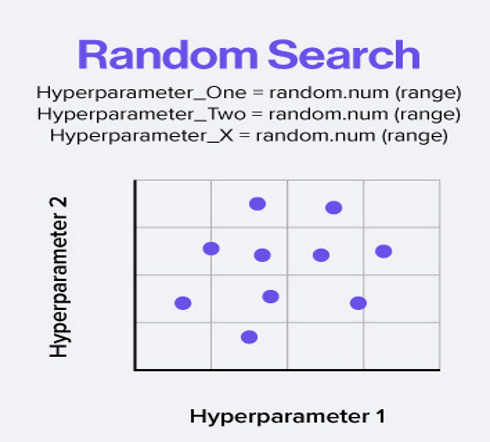

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [5, 10, 35, 50, 75, 100,
                                                         150]},
                   scoring='f1_macro')

In [43]:
rscv.best_params_

{'n_estimators': 100, 'max_depth': 11}

In [44]:
rscv.best_score_

np.float64(0.8840159338790706)

In [45]:
best_rfc = rscv.best_estimator_

In [46]:
best_rfc.score(xtrain,ytrain)

0.9548554864012277

In [47]:
best_rfc.score(xtest,ytest)

0.9503794014835024

## Step8: Model Evaluation

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

In [49]:
ypred_test = model.predict(xtest)
ypred_test[:5]

array([0, 0, 0, 0, 1])

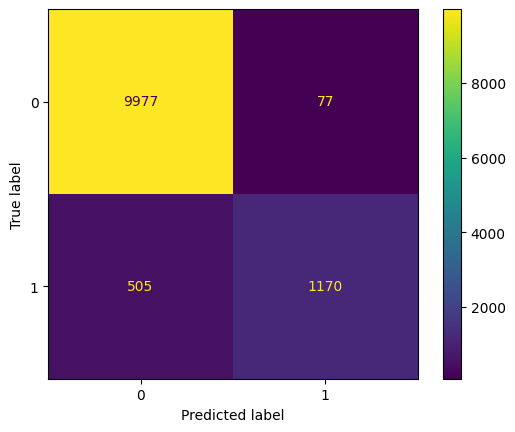

In [50]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [51]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10054
           1       0.86      0.51      0.64      1675

    accuracy                           0.92     11729
   macro avg       0.89      0.75      0.80     11729
weighted avg       0.91      0.92      0.91     11729



## Let's build Gradient Boost and XGBoost. We shall choose the best model among these three